In [1]:
# load all pip data and analyse
import os
import pandas as pd

# load all data from pip which is in this file path and subfolders

file_path = os.path.join('.', 'data/pip_all_data', 'pip.csv')

# load data into pandas dataframe
pip_data = pd.read_csv(file_path)


# find all unique values in the column "country_code" and count them
country_codes = pip_data['country_code'].unique()
print(country_codes)
print(len(country_codes))

# find all unique values in the column "survey year" and count them but subject to the condition that if a value has decimal value after . then cut this off and count only the integer value
survey_years = pip_data['survey_year'].unique()
print(survey_years) # this shows that there are some values with decimal values after . so we need to cut them off
survey_years = pip_data['survey_year'].astype(int).unique()
print(survey_years)
print(len(survey_years))

# clean the data such that the column "survey_year" only contains integer values
pip_data['survey_year'] = pip_data['survey_year'].astype(int)

# now count how often the value 2018 appears by looping over the column "survey_year" and counting how often the value 2018 appears in this column and also count if there is a value with decimal 
count = 0   
for year in pip_data['survey_year']:
    if int(year) == 2018:
        count += 1
print(count)


['AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE'
 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CYP' 'CZE'
 'DEU' 'DJI' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN' 'FJI'
 'FRA' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GRC' 'GTM' 'GUY'
 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA'
 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KIR' 'KOR' 'LAO' 'LBN' 'LBR' 'LCA'
 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NER'
 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NRU' 'PAK' 'PAN' 'PER' 'PHL' 'PNG' 'POL'
 'PRT' 'PRY' 'PSE' 'ROU' 'RUS' 'RWA' 'SDN' 'SEN' 'SLB' 'SLE' 'SLV' 'SRB'
 'SSD' 'STP' 'SUR' 'SVK' 'SVN' 'SWE' 'SWZ' 'SYC' 'SYR' 'TCD' 'TGO' 'THA'
 'TJK' 'TKM' 'TLS' 'TON' 'TTO' 'TUN' 'TUR' 'TUV' 'TWN' 'TZA' 'UGA' 'UKR'
 'URY' 'USA' 'UZB' 'VEN' 'VNM' 'VUT' 'WSM' 'XKX' 'Y

In [2]:
# find all countries for which there is data for the year 2018 and if there is no data for 2018 then which is the next year for which data is available
# loop over all countries and check if there is data for 2018 and make a dictionary indicating which is the most recent year with data availability
# Find all countries for which there is data for the year 2018,
# and if there is no data for 2018, then find the next year for which data is available.
country_year_available = {}

for country in country_codes:
    # Filter the dataframe for the specific country
    country_data = pip_data[pip_data['country_code'] == country]

    # Iterate over the years in descending order
    for year in sorted(survey_years, reverse=True):
        # Check if there is data for the current year
        if len(country_data[country_data['survey_year'] == year]) > 0:
            country_year_available[country] = year
            break  # Stop as soon as data is found for a year

print(country_year_available)

# store the dict country_year_available as a csv file
country_year_available_df = pd.DataFrame.from_dict(country_year_available, orient='index')
print(country_year_available_df)
# the path should be the file path from above but with the file name country_year_available.csv
country_year_available_df.to_csv('./data/pip_all_data/country_year_available.csv')

{'AGO': 2018, 'ALB': 2020, 'ARE': 2018, 'ARG': 2021, 'ARM': 2021, 'AUS': 2018, 'AUT': 2020, 'AZE': 2005, 'BDI': 2013, 'BEL': 2020, 'BEN': 2018, 'BFA': 2018, 'BGD': 2022, 'BGR': 2020, 'BIH': 2011, 'BLR': 2020, 'BLZ': 1999, 'BOL': 2021, 'BRA': 2021, 'BTN': 2022, 'BWA': 2015, 'CAF': 2021, 'CAN': 2019, 'CHE': 2018, 'CHL': 2020, 'CHN': 2020, 'CIV': 2018, 'CMR': 2014, 'COD': 2012, 'COG': 2011, 'COL': 2021, 'COM': 2014, 'CPV': 2015, 'CRI': 2022, 'CYP': 2020, 'CZE': 2020, 'DEU': 2019, 'DJI': 2017, 'DNK': 2020, 'DOM': 2021, 'DZA': 2011, 'ECU': 2022, 'EGY': 2019, 'ESP': 2020, 'EST': 2020, 'ETH': 2015, 'FIN': 2020, 'FJI': 2019, 'FRA': 2020, 'FSM': 2013, 'GAB': 2017, 'GBR': 2020, 'GEO': 2021, 'GHA': 2016, 'GIN': 2018, 'GMB': 2020, 'GNB': 2018, 'GRC': 2020, 'GTM': 2014, 'GUY': 1998, 'HND': 2019, 'HRV': 2020, 'HTI': 2012, 'HUN': 2020, 'IDN': 2022, 'IND': 2021, 'IRL': 2020, 'IRN': 2019, 'IRQ': 2012, 'ISL': 2017, 'ISR': 2018, 'ITA': 2020, 'JAM': 2004, 'JOR': 2010, 'JPN': 2013, 'KAZ': 2018, 'KEN': 2021

In [18]:
# find all countries for which there is data for the year 2018 and if there is no data for 2018 then which is the next year for which data is available
# loop over all countries and check if there is data for 2018 and make a dictionary indicating which is the most recent year with data availability
# Find all countries for which there is data for the year 2018,
# and if there is no data for 2018, then find the next year for which data is available.
# also make sure the welfare type is properly considered based on the following rule
# use income only if there is no consumption data available and only if the consumption is three or more years older than the income data

# Assuming pip_data and country_codes are already defined
# Assuming survey_years is a list of years in the dataset

# Initialize an empty DataFrame for country_year_available
country_year_available = pd.DataFrame(columns=['country', 'year', 'welfare_type'])

for country in country_codes:
    # Filter the dataframe for the specific country
    country_data = pip_data[pip_data['country_code'] == country]

    # Initialize variables to store the latest year for each welfare type
    latest_year_consumption = None
    latest_year_income = None

    # Iterate over the years in descending order for each welfare type
    for year in sorted(survey_years, reverse=True):
        # Check for consumption data
        if len(country_data[(country_data['survey_year'] == year) & (country_data['welfare_type'] == 'consumption')]) > 0:
            latest_year_consumption = year
            break

    for year in sorted(survey_years, reverse=True):
        # Check for income data
        if len(country_data[(country_data['survey_year'] == year) & (country_data['welfare_type'] == 'income')]) > 0:
            latest_year_income = year
            break

    # Determine which year to use based on the availability and comparison of welfare types
    if latest_year_consumption is not None and (latest_year_income is None or latest_year_consumption >= latest_year_income - 3):
        new_row = pd.DataFrame({'country': [country], 'year': [latest_year_consumption], 'welfare_type': ['consumption']})
        country_year_available = pd.concat([country_year_available, new_row], ignore_index=True)
    elif latest_year_income is not None:
        new_row = pd.DataFrame({'country': [country], 'year': [latest_year_income], 'welfare_type': ['income']})
        country_year_available = pd.concat([country_year_available, new_row], ignore_index=True)

# Output the results
print(country_year_available)

# Store the DataFrame as a csv file
country_year_available.to_csv('./data/pip_all_data/country_year_available.csv', index=False)

    country  year welfare_type
0       AGO  2018  consumption
1       ALB  2020  consumption
2       ARE  2018       income
3       ARG  2021       income
4       ARM  2021  consumption
..      ...   ...          ...
163     XKX  2017  consumption
164     YEM  2014  consumption
165     ZAF  2014  consumption
166     ZMB  2015  consumption
167     ZWE  2019  consumption

[168 rows x 3 columns]


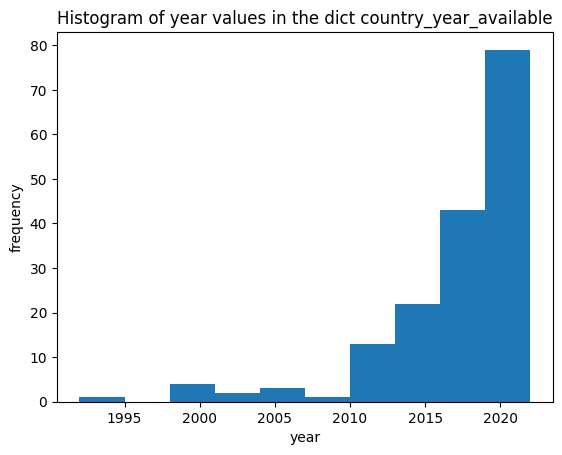

In [20]:
# plot histogram of the year values in the dataframe country_year_available year column including correct axes labelling
import matplotlib.pyplot as plt
plt.hist(country_year_available['year'])
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('Histogram of year values in the dict country_year_available')
plt.show()

In [25]:
# now make# Assuming country_year_available is already populated with data
# Create a list of countries where the year in the 'year' column is greater than 2010
countries_with_new_data = [row['country'] for index, row in country_year_available.iterrows() if row['year'] > 2010]

print(countries_with_new_data)  # List of countries with data newer than 2010
print(len(countries_with_new_data))  # Number of countries with data newer than 2010

# store this list as a csv file
countries_with_new_data_df = pd.DataFrame(countries_with_new_data)
print(countries_with_new_data_df)
# the path should be the file path from above but with the file name countries_with_new_data.csv
countries_with_new_data_df.to_csv('./data/pip_all_data/countries_with_new_data.csv')


['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KIR', 'KOR', 'LAO', 'LBN', 'LBR', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NRU', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'ROU', 'RUS', 'RWA', 'SDN', 'SEN', 'SLB', 'SLE', 'SLV', 'SRB', 'SSD', 'STP', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYC', 'TCD', 'TGO', 'THA', 'TJK', 'TLS', 'TON', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA'

In [24]:
# now subset all data for the countries in the list countries_with_new_data and their latest available year based on the dictionar country year available
# and the correctly chosen welfare type and store as a dataframe
# Assuming country_year_available is already populated with data
# Create a list of countries with data newer than 2010
countries_with_new_data = [row['country'] for index, row in country_year_available.iterrows() if row['year'] > 2010]

# Convert country_year_available DataFrame into a dictionary for mapping
# The dictionary will have country codes as keys and tuples of (year, welfare_type) as values
country_year_welfare_mapping = {row['country']: (row['year'], row['welfare_type']) for index, row in country_year_available.iterrows()}

# Subset all data for the countries in countries_with_new_data and their latest available year and welfare type
subset_pip_data = pip_data[
    (pip_data['country_code'].isin(countries_with_new_data)) &
    (pip_data['survey_year'] == pip_data['country_code'].apply(lambda x: country_year_welfare_mapping.get(x, (None, None))[0])) &
    (pip_data['welfare_type'] == pip_data['country_code'].apply(lambda x: country_year_welfare_mapping.get(x, (None, None))[1]))
]

print(subset_pip_data)
print(len(subset_pip_data))

# based on column reporting level in subset_pip_data throw out all rows that are not "national"" and store as a dataframe
# Assuming subset_pip_data is already populated with data
national_subset_pip_data = subset_pip_data[subset_pip_data['reporting_level'] == 'national']

# store the dataframe subset_pip_data as a csv file
national_subset_pip_data.to_csv('./data/pip_all_data/national_subset_pip_data.csv')

# argentina does not appear in the final subset of the data because it does not have any national level data

                      region_name region_code          country_name  \
2              Sub-Saharan Africa         SSA                Angola   
17          Europe & Central Asia         ECA               Albania   
19    Other High Income Countries         OHI  United Arab Emirates   
52      Latin America & Caribbean         LAC             Argentina   
75          Europe & Central Asia         ECA               Armenia   
...                           ...         ...                   ...   
2367        Europe & Central Asia         ECA                Kosovo   
2370   Middle East & North Africa         MNA           Yemen, Rep.   
2376           Sub-Saharan Africa         SSA          South Africa   
2385           Sub-Saharan Africa         SSA                Zambia   
2388           Sub-Saharan Africa         SSA              Zimbabwe   

     country_code  reporting_year reporting_level survey_acronym  \
2             AGO            2018        national          IDREA   
17         